Dataset: movies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
cols=["movie_id", "title", "genre"]
movies= pd.read_table("movies.dat", sep="::", header=None, names=cols)
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
del movies["movie_id"]
movies.head()

,title,genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [4]:
movies[["movie_title", "year"]]= movies.title.str.extract("(.*)\s\((\d+)", expand=True)
movies.head()

,title,genre,movie_title,year
0,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
2,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
4,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [5]:
movies= movies[["title", "movie_title", "year", "genre"]]
movies.head()

,title,movie_title,year,genre
0,Toy Story (1995),Toy Story,1995,Animation|Children's|Comedy
1,Jumanji (1995),Jumanji,1995,Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Grumpier Old Men,1995,Comedy|Romance
3,Waiting to Exhale (1995),Waiting to Exhale,1995,Comedy|Drama
4,Father of the Bride Part II (1995),Father of the Bride Part II,1995,Comedy


In [6]:
dummies= movies["genre"].str.get_dummies()
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
tidy_movies=(pd.concat([movies, dummies], axis=1)
            .drop(["genre"], axis=1))
tidy_movies.head()

,title,movie_title,year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II (1995),Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora ya tenemos ordenada la data para trabajar.
"Title" separado en "movie_title" + "year" 
"Genre" separado utilizando dummies (y después borrado). Ahora hay una columna por genero de pelicula y abajo de esa columna valores 1 o 0 según corresponda.

In [8]:
tidy_movies.columns

Index(['title', 'movie_title', 'year', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

Tenemos 18 generos unicos, ordenados alfabeticamente.

In [9]:
tidy_movies.shape

(3883, 21)

Hay 3883 entries en nuestro dataframe, en otras palabras, 3883 peliculas.

In [10]:
tidy_movies.dtypes

title          object
movie_title    object
year           object
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

In [11]:
tidy_movies.year.unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', nan, '1971',
       '1979', '1966', '1978', '1985', '1983', '1984', '1931', '1922',
       '1927', '1929', '1928', '1925', '1923', '1999', '1919', '2000',
       '1920', '1921'], dtype=object)

Vemos que nuestra dataframe recoge datos desde 1919 hasta 2000 inclusive.

In [14]:
tidy_movies.year.isnull().sum() #para ver cuantos entries tiene nan en la columna year.

1

In [15]:
tidy_movies.dropna(subset=["year"]) #como es solo 1 y el dataframe tiene casi 4000 entries, podemos sacarlo sin problemas.

,title,movie_title,year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),Toy Story,1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji (1995),Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale (1995),Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II (1995),Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,Meet the Parents (2000),Meet the Parents,2000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,Requiem for a Dream (2000),Requiem for a Dream,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,Tigerland (2000),Tigerland,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,Two Family House (2000),Two Family House,2000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


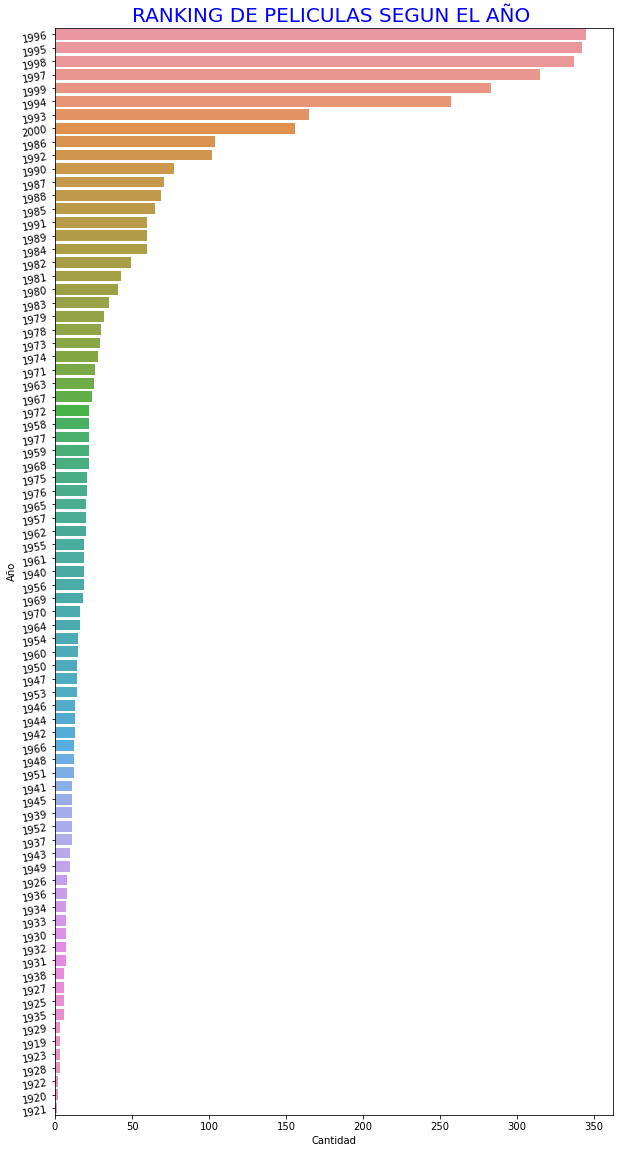

In [16]:
title= "RANKING DE PELICULAS SEGUN EL AÑO "
plt.figure(figsize=(10,20))
sns.countplot(y=tidy_movies["year"], order=tidy_movies["year"].value_counts().index)
plt.title(title, fontsize=20, color="Blue")
plt.yticks(rotation=10)
plt.ylabel("Año")
plt.xlabel("Cantidad")
plt.show()

Los top 10 años en cuanto a cantidad de peliculas fueron los 90s, 2000 y ´86. Como no sabemos cómo fue recolectada la muestra, no sabemos que tan representativo es de la realidad (si realmente esos años fueron los que más producciones hubo o en esos años se recolectaron más información, etc).

In [17]:
#Para saber la distribucion de generos del total de peliculas.
tidy_movies.iloc[:, 3:21].sum()

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

Los top 2 generos son drama y comedia. 

In [43]:
#creo un dataframe 
genero=['Action', 'Adventure', 'Animation',
       "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']
total=[503, 283, 105, 251, 1200, 211, 127, 1603, 68, 44, 343, 114, 106, 471, 276, 492, 143, 68]
list_of_tuples=list(zip(genero, total))
list_of_tuples
new_genre_total=pd.DataFrame(list_of_tuples, columns=["genero", "total"])
new_genre_total

,genero,total
0,Action,503
1,Adventure,283
2,Animation,105
3,Children's,251
4,Comedy,1200
5,Crime,211
6,Documentary,127
7,Drama,1603
8,Fantasy,68
9,Film-Noir,44


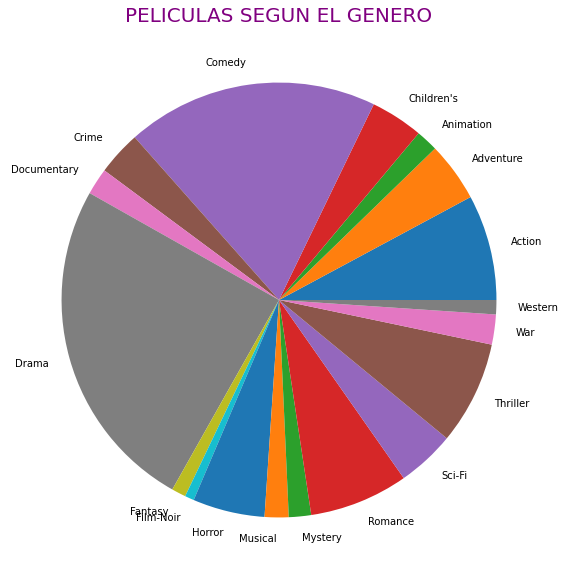

In [50]:
x=new_genre_total["total"]
y=new_genre_total["genero"]
title="PELICULAS SEGUN EL GENERO"
plt.figure(figsize=(10, 10))
plt.title(title, fontsize=20, color="Purple")
plt.pie(x, labels = y)
plt.show() 

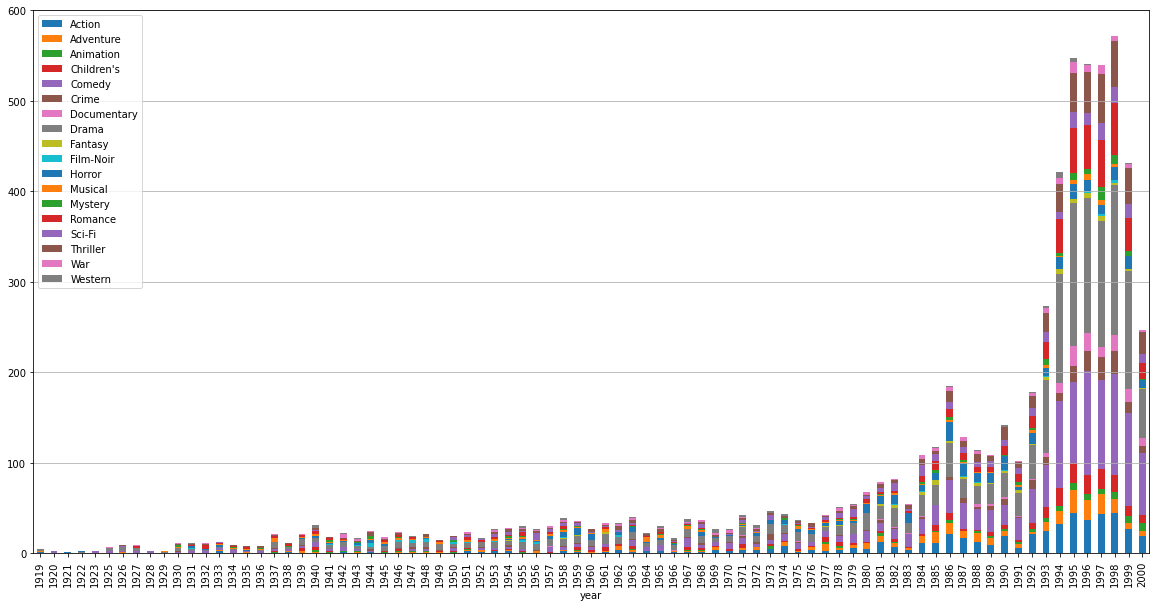

In [91]:
#Distribucion de genero por año
plt.rcParams["figure.figsize"] = [20, 10]
tidy_movies.groupby('year').sum().plot(kind='bar', stacked=True)
plt.grid(axis = 'y')

plt.show()